In [341]:
import pandas as pd
import seaborn as sns
#the file is a number of data from ImmoScout (webscrapped for all Germany)
file_path = 'https://raw.githubusercontent.com/okravtsova123/ironhack_study/main/MidTermProject/rent.csv'

# reading file with different encodings
try:
    df = pd.read_csv(file_path, encoding='utf-8', sep=';')
except UnicodeDecodeError:
    try:
        df = pd.read_csv(file_path, encoding='latin-1',  sep=';')
    except UnicodeDecodeError:
        df = pd.read_csv(file_path, encoding='ISO-8859-1',  sep=';')


# Cleanng and preparing data

In [342]:
#checking the df
df.head()

,regio1,serviceCharge,heatingType,telekomTvOffer,telekomHybridUploadSpeed,newlyConst,balcony,picturecount,pricetrend,telekomUploadSpeed,...,typeOfFlat,geo_plz,noRooms,thermalChar,floor,numberOfFloors,noRoomsRange,garden,livingSpaceRange,energyEfficiencyClass
0,Nordrhein_Westfalen,245.00,central_heating,ONE_YEAR_FREE,NaN,False,False,6,4.62,10.0,...,ground_floor,44269,4.0,181.4,1.0,3.0,4,True,4,NaN
1,Rheinland_Pfalz,134.00,self_contained_central_heating,ONE_YEAR_FREE,NaN,False,True,8,3.47,10.0,...,ground_floor,67459,3.0,NaN,NaN,NaN,3,False,4,NaN
2,Sachsen,255.00,floor_heating,ONE_YEAR_FREE,10.0,True,True,8,2.72,2.4,...,apartment,1097,3.0,NaN,3.0,4.0,3,False,4,NaN
3,Sachsen,58.15,district_heating,ONE_YEAR_FREE,NaN,False,True,9,1.53,40.0,...,other,9599,3.0,86.0,3.0,NaN,3,False,2,NaN
4,Bremen,138.00,self_contained_central_heating,NaN,NaN,False,True,19,2.46,NaN,...,apartment,28213,3.0,188.9,1.0,NaN,3,False,4,NaN


In [343]:
# Performing additional formatting for column names (lowercase, strip and replace spaces with underscores) - esier to work further
df.columns = [name.strip().replace(" ", "_").lower() for name in df.columns]

In [344]:
df.columns

Index(['regio1', 'servicecharge', 'heatingtype', 'telekomtvoffer',
       'telekomhybriduploadspeed', 'newlyconst', 'balcony', 'picturecount',
       'pricetrend', 'telekomuploadspeed', 'totalrent', 'yearconstructed',
       'scoutid', 'noparkspaces', 'firingtypes', 'haskitchen', 'geo_bln',
       'cellar', 'yearconstructedrange', 'baserent', 'housenumber',
       'livingspace', 'geo_krs', 'condition', 'interiorqual', 'petsallowed',
       'street', 'streetplain', 'lift', 'baserentrange', 'typeofflat',
       'geo_plz', 'norooms', 'thermalchar', 'floor', 'numberoffloors',
       'noroomsrange', 'garden', 'livingspacerange', 'energyefficiencyclass'],
      dtype='object')

In [345]:
#function to check null values
def null_check(df):
    print(f'Total null values per row: \n{df.isnull().sum(axis=1)}\n')
    print(f'Total null values per column: \n{df.isnull().sum()}\n')

In [346]:
#applying
null_check(df)

Total null values per row: 
0         3
1         8
2         4
3         8
4         8
         ..
268845    7
268846    7
268847    3
268848    4
268849    9
Length: 268850, dtype: int64

Total null values per column: 
regio1                           0
servicecharge                 6909
heatingtype                  44856
telekomtvoffer               32619
telekomhybriduploadspeed    223830
newlyconst                       0
balcony                          0
picturecount                     0
pricetrend                    1832
telekomuploadspeed           33358
totalrent                    40517
yearconstructed              57045
scoutid                          0
noparkspaces                175798
firingtypes                  56964
haskitchen                       0
geo_bln                          0
cellar                           0
yearconstructedrange         57045
baserent                         0
housenumber                  71018
livingspace                      0
geo_krs  

In [347]:
#function to find duplicates
def dup_check(df):
    print(f'Duplicates found: {df.duplicated().any()}\n')
    print(f'Number of duplicates: {df.duplicated().sum()}\n')

In [348]:
dup_check(df)

Duplicates found: False

Number of duplicates: 0



In [349]:
#Choosing only new buildings as rent is not controlled by government
df = df[(df['newlyconst']== True)]

In [350]:
df

,regio1,servicecharge,heatingtype,telekomtvoffer,telekomhybriduploadspeed,newlyconst,balcony,picturecount,pricetrend,telekomuploadspeed,...,typeofflat,geo_plz,norooms,thermalchar,floor,numberoffloors,noroomsrange,garden,livingspacerange,energyefficiencyclass
2,Sachsen,255.00,floor_heating,ONE_YEAR_FREE,10.0,True,True,8,2.72,2.4,...,apartment,1097,3.0,NaN,3.0,4.0,3,False,4,NaN
14,Nordrhein_Westfalen,215.00,gas_heating,ONE_YEAR_FREE,10.0,True,True,12,3.76,2.4,...,ground_floor,44229,3.0,NaN,0.0,4.0,3,False,4,NaN
29,Mecklenburg_Vorpommern,104.02,district_heating,ONE_YEAR_FREE,NaN,True,True,13,3.72,40.0,...,raised_ground_floor,19055,2.0,71.53,NaN,NaN,2,False,2,NaN
48,Schleswig_Holstein,121.50,NaN,NaN,NaN,True,True,2,3.90,NaN,...,NaN,25379,3.0,65.00,2.0,2.0,3,False,4,B
69,Sachsen,190.00,floor_heating,ONE_YEAR_FREE,NaN,True,True,14,2.88,40.0,...,ground_floor,1097,3.0,51.30,0.0,NaN,3,False,3,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268806,Baden_W?rttemberg,400.00,district_heating,NaN,NaN,True,True,8,3.99,NaN,...,penthouse,68305,4.0,NaN,1.0,4.0,4,True,7,NaN
268809,Nordrhein_Westfalen,189.65,heat_pump,NaN,NaN,True,True,0,3.78,NaN,...,NaN,51491,2.0,NaN,NaN,NaN,2,False,2,NaN
268821,Rheinland_Pfalz,80.00,central_heating,ON_DEMAND,NaN,True,True,14,3.54,2.4,...,apartment,56281,2.0,NaN,1.0,2.0,2,False,3,NaN
268827,Niedersachsen,200.00,central_heating,ONE_YEAR_FREE,10.0,True,True,10,4.30,2.4,...,apartment,30900,2.5,NaN,1.0,2.0,2,False,4,NaN


In [351]:
#choosing the facors for the model
df = df.loc[:, ['baserent', 'regio1', 'heatingtype', 'balcony', 'noparkspaces', 'firingtypes', 'haskitchen',
       'cellar','livingspace', 'geo_krs', 'condition', 'petsallowed', 'lift',
       'geo_plz', 'norooms', 'floor', 'numberoffloors', 'garden', 'energyefficiencyclass']]


In [352]:
df

,baserent,regio1,heatingtype,balcony,noparkspaces,firingtypes,haskitchen,cellar,livingspace,geo_krs,condition,petsallowed,lift,geo_plz,norooms,floor,numberoffloors,garden,energyefficiencyclass
2,965.00,Sachsen,floor_heating,True,1.0,NaN,False,True,83.80,Dresden,first_time_use,NaN,True,1097,3.0,3.0,4.0,False,NaN
14,972.60,Nordrhein_Westfalen,gas_heating,True,1.0,gas,False,True,87.00,Dortmund,first_time_use,negotiable,True,44229,3.0,0.0,4.0,False,NaN
29,520.08,Mecklenburg_Vorpommern,district_heating,True,1.0,district_heating,False,True,47.28,Schwerin,first_time_use,NaN,True,19055,2.0,NaN,NaN,False,NaN
48,870.00,Schleswig_Holstein,NaN,True,NaN,pellet_heating,True,False,81.00,Steinburg_Kreis,NaN,NaN,False,25379,3.0,2.0,2.0,False,B
69,900.00,Sachsen,floor_heating,True,1.0,district_heating,False,True,74.80,Dresden,first_time_use,NaN,True,1097,3.0,0.0,NaN,False,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268806,2200.00,Baden_W?rttemberg,district_heating,True,1.0,district_heating,True,True,169.00,Mannheim,first_time_use,negotiable,True,68305,4.0,1.0,4.0,True,NaN
268809,371.43,Nordrhein_Westfalen,heat_pump,True,1.0,NaN,False,True,59.38,Rheinisch_Bergischer_Kreis,first_time_use,no,True,51491,2.0,NaN,NaN,False,NaN
268821,680.00,Rheinland_Pfalz,central_heating,True,1.0,gas,False,True,79.50,Rhein_Hunsr?ck_Kreis,first_time_use,no,False,56281,2.0,1.0,2.0,False,NaN
268827,990.00,Niedersachsen,central_heating,True,1.0,pellet_heating,True,False,89.00,Hannover_Kreis,first_time_use,no,True,30900,2.5,1.0,2.0,False,NaN


In [353]:
df = df.reset_index()

In [354]:
df

,index,baserent,regio1,heatingtype,balcony,noparkspaces,firingtypes,haskitchen,cellar,livingspace,geo_krs,condition,petsallowed,lift,geo_plz,norooms,floor,numberoffloors,garden,energyefficiencyclass
0,2,965.00,Sachsen,floor_heating,True,1.0,NaN,False,True,83.80,Dresden,first_time_use,NaN,True,1097,3.0,3.0,4.0,False,NaN
1,14,972.60,Nordrhein_Westfalen,gas_heating,True,1.0,gas,False,True,87.00,Dortmund,first_time_use,negotiable,True,44229,3.0,0.0,4.0,False,NaN
2,29,520.08,Mecklenburg_Vorpommern,district_heating,True,1.0,district_heating,False,True,47.28,Schwerin,first_time_use,NaN,True,19055,2.0,NaN,NaN,False,NaN
3,48,870.00,Schleswig_Holstein,NaN,True,NaN,pellet_heating,True,False,81.00,Steinburg_Kreis,NaN,NaN,False,25379,3.0,2.0,2.0,False,B
4,69,900.00,Sachsen,floor_heating,True,1.0,district_heating,False,True,74.80,Dresden,first_time_use,NaN,True,1097,3.0,0.0,NaN,False,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21166,268806,2200.00,Baden_W?rttemberg,district_heating,True,1.0,district_heating,True,True,169.00,Mannheim,first_time_use,negotiable,True,68305,4.0,1.0,4.0,True,NaN
21167,268809,371.43,Nordrhein_Westfalen,heat_pump,True,1.0,NaN,False,True,59.38,Rheinisch_Bergischer_Kreis,first_time_use,no,True,51491,2.0,NaN,NaN,False,NaN
21168,268821,680.00,Rheinland_Pfalz,central_heating,True,1.0,gas,False,True,79.50,Rhein_Hunsr?ck_Kreis,first_time_use,no,False,56281,2.0,1.0,2.0,False,NaN
21169,268827,990.00,Niedersachsen,central_heating,True,1.0,pellet_heating,True,False,89.00,Hannover_Kreis,first_time_use,no,True,30900,2.5,1.0,2.0,False,NaN


In [355]:
null_check(df)

Total null values per row: 
0        3
1        1
2        4
3        4
4        2
        ..
21166    1
21167    4
21168    1
21169    1
21170    1
Length: 21171, dtype: int64

Total null values per column: 
index                        0
baserent                     0
regio1                       0
heatingtype               3045
balcony                      0
noparkspaces              6611
firingtypes               5328
haskitchen                   0
cellar                       0
livingspace                  0
geo_krs                      0
condition                 2433
petsallowed               9357
lift                         0
geo_plz                      0
norooms                      0
floor                     5238
numberoffloors            7018
garden                       0
energyefficiencyclass    11456
dtype: int64



In [356]:
df = df.dropna()

In [357]:
#checking unqiue values in hitting
df['heatingtype'].unique()

array(['central_heating', 'floor_heating', 'district_heating',
       'combined_heat_and_power_plant', 'gas_heating',
       'wood_pellet_heating', 'heat_pump',
       'self_contained_central_heating', 'solar_heating', 'stove_heating',
       'oil_heating', 'electric_heating'], dtype=object)

In [358]:
#checking unqiue values in coditions
df['condition'].unique()

array(['fully_renovated', 'first_time_use', 'mint_condition',
       'first_time_use_after_refurbishment', 'well_kept', 'refurbished'],
      dtype=object)

In [359]:
#checking unqiue values in coditions
df['firingtypes'].nunique()

37

In [360]:
#unifying first time use and all refurbishement, modernization and renovation in 1 thing

def condition_clean(state):
        if 'first_time_use' in state:
            state='first_time_use'
        elif state=='fully_renovated' or state=='refurbished' or state=='modernized':
            state='refurbished'
        else:
            state=state
        return state
    
#unifying types of firing

def firingtypes_clean(ftype):
    if 'gas' in ftype:
        ftype='gas'
    elif 'electricity' in ftype:
        ftype='electricity'
    elif 'solar_heating' in ftype or 'wind_energy' in ftype or'hydro_energy' in ftype or 'bio_energy' in ftype or 'geothermal' in ftype or 'thermal_energy' in ftype or 'renewable_energy' in ftype or 'regenerative_energy' in ftype:
        ftype='renewable_energy_heating'
    elif "pellet_heating" in ftype or 'fossil_fuels' in ftype or 'wood_chips' in ftype:
        ftype='pellet_heating'
    elif 'district_heating' in ftype:
        ftype='district_heating'
    else:
        ftype=ftype
    return ftype

In [361]:
#applying defined function for cleaning    
df['condition']=df['condition'].apply(condition_clean)
df['firingtypes']=df['firingtypes'].apply(firingtypes_clean)

C:\Users\user\AppData\Local\Temp\ipykernel_20728\2519932501.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['condition']=df['condition'].apply(condition_clean)
C:\Users\user\AppData\Local\Temp\ipykernel_20728\2519932501.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['firingtypes']=df['firingtypes'].apply(firingtypes_clean)


In [362]:
#checking energyefficiencyclass
print(df["energyefficiencyclass"].groupby(df["energyefficiencyclass"]).count())

#droping rows with NO_INFORMATION
df=df[df["energyefficiencyclass"]!='NO_INFORMATION'].reset_index()

energyefficiencyclass
A                 771
A_PLUS            677
B                 687
C                 102
D                  24
E                   3
F                   2
NO_INFORMATION    404
Name: energyefficiencyclass, dtype: int64


In [455]:
#cleaning two useless columns. And heatng type is removed as it's a copy of firing type
columns_needed=['baserent', 'balcony', 'noparkspaces', 'haskitchen',
       'cellar','livingspace', 'geo_krs', 'petsallowed', 'lift', 'norooms', 'floor', 'numberoffloors', 'garden', 'energyefficiencyclass']
df=df.loc[: , columns_needed]

,baserent,balcony,noparkspaces,haskitchen,cellar,livingspace,geo_krs,petsallowed,lift,norooms,floor,numberoffloors,garden,energyefficiencyclass
0,1680.00,True,1.0,True,True,91.00,M?nchen,no,True,1.5,2.0,3.0,False,A
1,950.00,True,1.0,False,True,69.00,Erding_Kreis,negotiable,False,2.0,1.0,2.0,False,B
2,1321.61,True,1.0,False,True,104.89,Leipzig,negotiable,True,4.0,4.0,4.0,False,B
3,899.00,True,1.0,True,True,79.64,Braunschweig,negotiable,True,2.0,0.0,4.0,True,A
4,920.00,True,1.0,False,True,115.00,Plauen,negotiable,True,4.0,2.0,3.0,True,A_PLUS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2261,720.00,True,1.0,False,True,80.00,Siegen_Wittgenstein_Kreis,negotiable,True,2.0,3.0,4.0,False,A_PLUS
2262,890.00,True,2.0,False,True,87.00,Ludwigsburg_Kreis,no,True,3.0,3.0,3.0,False,B
2263,1159.36,True,2.0,False,True,144.92,Leipzig,no,True,4.0,1.0,5.0,False,B
2264,1450.00,True,1.0,True,True,135.00,T?bingen_Kreis,no,False,5.5,1.0,2.0,False,A_PLUS


In [403]:
#cheking spelling mistakes in regio1
#df['regio1'].groupby(df['regio1']).count()

In [404]:
#clening misspellings

def regio1_clean(region):
    if region=='Baden_W?rttemberg':
        region='Baden-Württemberg'
    elif region=='Th?ringen':
        region='Thüringia'
    else:
        region=region
    return region

In [406]:
#applying
#df['regio1']=df['regio1'].apply(regio1_clean)

In [407]:
#cheking spelling mistakes in geo_krs
df['geo_krs'].groupby(df['geo_krs']).count()

for city in df['geo_krs'].unique():
    if "?" in city:
        print(city)

M?nchen
D?sseldorf
Mei?en_Kreis
N?rnberg
D?ren_Kreis
Alt?tting_Kreis
Oberallg?u_Kreis
Unterallg?u_Kreis
Bad_T?lz_Wolfratshausen_Kreis
B?blingen_Kreis
F?rstenfeldbruck_Kreis
Gro?_Gerau_Kreis
K?ln
M?nchengladbach
Osnabr?ck
M?hldorf_am_Inn_Kreis
T?bingen_Kreis
Osnabr?ck_Kreis
M?nster
R?gen_Kreis
M?nchen_Kreis
Stadtverband_Saarbr?cken_Kreis
Rhein_Hunsr?ck_Kreis
Erlangen_H?chstadt_Kreis
Bergstra?e_Kreis
Eichst?tt_Kreis
Neustadt_an_der_Weinstra?e
Kempten_Allg?u
G?ttingen_Kreis
Rendsburg_Eckernf?rde_Kreis
B?rde_Kreis
Minden_L?bbecke_Kreis
G?ppingen_Kreis
Wei?enburg_Gunzenhausen_Kreis
M?rkisch_Oderland_Kreis
S?dliche_Weinstra?e_Kreis
G?tersloh_Kreis
M?lheim_an_der_Ruhr
Bad_D?rkheim_Kreis
F?rth
L?rrach_Kreis
S?chsische_Schweiz_Osterzgebirge_Kreis
Zweibr?cken
Gie?en_Kreis
F?rth_Kreis
W?rzburg_Kreis
Schw?bisch_Hall_Kreis
Rotenburg_W?mme_Kreis
Wolfenb?ttel_Kreis
Teltow_Fl?ming_Kreis


In [408]:
#checking outliers - identifying IQR

df['baserent'].describe()
IQR=df['baserent'].quantile(0.75)-df['baserent'].quantile(0.25)
base_min=df['baserent'].quantile(0.25)-1.5*IQR
base_max=df['baserent'].quantile(0.75)+3*IQR
print(base_min, base_max)

#countring how many flats are outliers
x_low=0
x_high=0
for price in df['baserent']:
    if price<base_min:
        x_low+=1
    elif price>base_max:
        x_high+=1

print(f'outliers too low:{x_low}\noutliers too high: {x_high}')

5.0 2920.0
outliers too low:0
outliers too high: 4


In [409]:
#dropping rows with outliers
df=df.loc[df['baserent']<base_max]

# ENCODING FACTORS FOR MODEL CREATION

In [459]:
df.dtypes

baserent                 float64
balcony                     bool
noparkspaces             float64
haskitchen                  bool
cellar                      bool
livingspace              float64
geo_krs                   object
petsallowed               object
lift                        bool
norooms                  float64
floor                    float64
numberoffloors           float64
garden                      bool
energyefficiencyclass     object
dtype: object

In [461]:
#splitting df into numericals and categoricals
categoricals = df.select_dtypes(include=[object, bool])
numericals = df.select_dtypes(include = 'number')

In [462]:
categoricals

,balcony,haskitchen,cellar,geo_krs,petsallowed,lift,garden,energyefficiencyclass
0,True,True,True,M?nchen,no,True,False,A
1,True,False,True,Erding_Kreis,negotiable,False,False,B
2,True,False,True,Leipzig,negotiable,True,False,B
3,True,True,True,Braunschweig,negotiable,True,True,A
4,True,False,True,Plauen,negotiable,True,True,A_PLUS
...,...,...,...,...,...,...,...,...
2261,True,False,True,Siegen_Wittgenstein_Kreis,negotiable,True,False,A_PLUS
2262,True,False,True,Ludwigsburg_Kreis,no,True,False,B
2263,True,False,True,Leipzig,no,True,False,B
2264,True,True,True,T?bingen_Kreis,no,False,False,A_PLUS


In [505]:
numericals=numericals.reset_index()
numericals

,index,baserent,noparkspaces,livingspace,norooms,floor,numberoffloors
0,0,1680.00,1.0,91.00,1.5,2.0,3.0
1,1,950.00,1.0,69.00,2.0,1.0,2.0
2,2,1321.61,1.0,104.89,4.0,4.0,4.0
3,3,899.00,1.0,79.64,2.0,0.0,4.0
4,4,920.00,1.0,115.00,4.0,2.0,3.0
...,...,...,...,...,...,...,...
2240,2261,720.00,1.0,80.00,2.0,3.0,4.0
2241,2262,890.00,2.0,87.00,3.0,3.0,3.0
2242,2263,1159.36,2.0,144.92,4.0,1.0,5.0
2243,2264,1450.00,1.0,135.00,5.5,1.0,2.0


In [489]:
ordinals = categoricals[["energyefficiencyclass", "balcony","haskitchen", "cellar", "lift", "garden"]].reset_index()
nominals = categoricals.drop(columns=["energyefficiencyclass", "balcony","haskitchen", "cellar", "lift", "garden"]).reset_index()

In [490]:
#checking how we will encode the ordinals
ordinals["energyefficiencyclass"].groupby(df["energyefficiencyclass"]).count()

energyefficiencyclass
A         755
A_PLUS    665
B         675
C         100
D          24
E           3
F           2
Name: energyefficiencyclass, dtype: int64

In [491]:
from sklearn.preprocessing import OrdinalEncoder

In [492]:
#encoding energy efficiency class for model creation

enc = OrdinalEncoder(categories=[["A_PLUS", "A", "B", "C","D", "E", "F"]])
ordinals["energyefficiencyclass"] = enc.fit_transform(ordinals[["energyefficiencyclass"]])

In [493]:
#encoding haskitchen for model creation

ordinals["haskitchen"] = ordinals["haskitchen"].astype(object)
enc = OrdinalEncoder(categories=[[True, False]])
ordinals["haskitchen"] = enc.fit_transform(ordinals[["haskitchen"]])

In [494]:
#encoding balcony for model creation

ordinals["balcony"] = ordinals["balcony"].astype(object)
enc = OrdinalEncoder(categories=[[True, False]])
ordinals["balcony"] = enc.fit_transform(ordinals[["balcony"]])

In [495]:
#encoding cellar for model creation

ordinals["cellar"] = ordinals["cellar"].astype(object)
enc = OrdinalEncoder(categories=[[True, False]])
ordinals["cellar"] = enc.fit_transform(ordinals[["cellar"]])

In [496]:
#encoding lift for model creation

ordinals["lift"] = ordinals["lift"].astype(object)
enc = OrdinalEncoder(categories=[[True, False]])
ordinals["lift"] = enc.fit_transform(ordinals[["lift"]])

In [497]:
#encoding garden for model creation

ordinals["garden"] = ordinals["garden"].astype(object)
enc = OrdinalEncoder(categories=[[True, False]])
ordinals["garden"] = enc.fit_transform(ordinals[["garden"]])

In [498]:
ordinals

,index,energyefficiencyclass,balcony,haskitchen,cellar,lift,garden
0,0,1.0,0.0,0.0,0.0,0.0,1.0
1,1,2.0,0.0,1.0,0.0,1.0,1.0
2,2,2.0,0.0,1.0,0.0,0.0,1.0
3,3,1.0,0.0,0.0,0.0,0.0,0.0
4,4,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...
2240,2261,0.0,0.0,1.0,0.0,0.0,1.0
2241,2262,2.0,0.0,1.0,0.0,0.0,1.0
2242,2263,2.0,0.0,1.0,0.0,0.0,1.0
2243,2264,0.0,0.0,0.0,0.0,1.0,1.0


In [499]:
#making dunnies from nominals
nominals = pd.get_dummies(nominals, dtype=int)

In [500]:
nominals

,index,geo_krs_Aachen,geo_krs_Aachen_Kreis,geo_krs_Ahrweiler_Kreis,geo_krs_Alb_Donau_Kreis,geo_krs_Alt?tting_Kreis,geo_krs_Altenkirchen_Westerwald_Kreis,geo_krs_Alzey_Worms_Kreis,geo_krs_Ammerland_Kreis,geo_krs_Anhalt_Bitterfeld_Kreis,...,geo_krs_Wiesbaden,geo_krs_Wolfenb?ttel_Kreis,geo_krs_Wolfsburg,geo_krs_Worms,geo_krs_Wuppertal,geo_krs_Zollernalbkreis,geo_krs_Zweibr?cken,petsallowed_negotiable,petsallowed_no,petsallowed_yes
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2240,2261,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2241,2262,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2242,2263,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2243,2264,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [507]:
#concating ordinals and nominals
categorical = pd.concat([ordinals,nominals], axis=1).reset_index()

In [508]:
categorical

,level_0,index,energyefficiencyclass,balcony,haskitchen,cellar,lift,garden,index,geo_krs_Aachen,...,geo_krs_Wiesbaden,geo_krs_Wolfenb?ttel_Kreis,geo_krs_Wolfsburg,geo_krs_Worms,geo_krs_Wuppertal,geo_krs_Zollernalbkreis,geo_krs_Zweibr?cken,petsallowed_negotiable,petsallowed_no,petsallowed_yes
0,0,0,1.0,0.0,0.0,0.0,0.0,1.0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,1,1,2.0,0.0,1.0,0.0,1.0,1.0,1,0,...,0,0,0,0,0,0,0,1,0,0
2,2,2,2.0,0.0,1.0,0.0,0.0,1.0,2,0,...,0,0,0,0,0,0,0,1,0,0
3,3,3,1.0,0.0,0.0,0.0,0.0,0.0,3,0,...,0,0,0,0,0,0,0,1,0,0
4,4,4,0.0,0.0,1.0,0.0,0.0,0.0,4,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2240,2240,2261,0.0,0.0,1.0,0.0,0.0,1.0,2261,0,...,0,0,0,0,0,0,0,1,0,0
2241,2241,2262,2.0,0.0,1.0,0.0,0.0,1.0,2262,0,...,0,0,0,0,0,0,0,0,1,0
2242,2242,2263,2.0,0.0,1.0,0.0,0.0,1.0,2263,0,...,0,0,0,0,0,0,0,0,1,0
2243,2243,2264,0.0,0.0,0.0,0.0,1.0,1.0,2264,0,...,0,0,0,0,0,0,0,0,1,0


In [509]:
#concating categoricals and numericals
final_df = pd.concat([numericals,ordinals,nominals], axis=1)

In [510]:
final_df=final_df.drop('index', axis=1)
final_df

,baserent,noparkspaces,livingspace,norooms,floor,numberoffloors,energyefficiencyclass,balcony,haskitchen,cellar,...,geo_krs_Wiesbaden,geo_krs_Wolfenb?ttel_Kreis,geo_krs_Wolfsburg,geo_krs_Worms,geo_krs_Wuppertal,geo_krs_Zollernalbkreis,geo_krs_Zweibr?cken,petsallowed_negotiable,petsallowed_no,petsallowed_yes
0,1680.00,1.0,91.00,1.5,2.0,3.0,1.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,1,0
1,950.00,1.0,69.00,2.0,1.0,2.0,2.0,0.0,1.0,0.0,...,0,0,0,0,0,0,0,1,0,0
2,1321.61,1.0,104.89,4.0,4.0,4.0,2.0,0.0,1.0,0.0,...,0,0,0,0,0,0,0,1,0,0
3,899.00,1.0,79.64,2.0,0.0,4.0,1.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,1,0,0
4,920.00,1.0,115.00,4.0,2.0,3.0,0.0,0.0,1.0,0.0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2240,720.00,1.0,80.00,2.0,3.0,4.0,0.0,0.0,1.0,0.0,...,0,0,0,0,0,0,0,1,0,0
2241,890.00,2.0,87.00,3.0,3.0,3.0,2.0,0.0,1.0,0.0,...,0,0,0,0,0,0,0,0,1,0
2242,1159.36,2.0,144.92,4.0,1.0,5.0,2.0,0.0,1.0,0.0,...,0,0,0,0,0,0,0,0,1,0
2243,1450.00,1.0,135.00,5.5,1.0,2.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,1,0


# Model creation
## X-y split (y is the target variable, in this case, "base rent")

In [511]:
#X-y split
X=final_df.drop('baserent', axis=1)
y=final_df[['baserent']]

In [512]:
X

,noparkspaces,livingspace,norooms,floor,numberoffloors,energyefficiencyclass,balcony,haskitchen,cellar,lift,...,geo_krs_Wiesbaden,geo_krs_Wolfenb?ttel_Kreis,geo_krs_Wolfsburg,geo_krs_Worms,geo_krs_Wuppertal,geo_krs_Zollernalbkreis,geo_krs_Zweibr?cken,petsallowed_negotiable,petsallowed_no,petsallowed_yes
0,1.0,91.00,1.5,2.0,3.0,1.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,1,0
1,1.0,69.00,2.0,1.0,2.0,2.0,0.0,1.0,0.0,1.0,...,0,0,0,0,0,0,0,1,0,0
2,1.0,104.89,4.0,4.0,4.0,2.0,0.0,1.0,0.0,0.0,...,0,0,0,0,0,0,0,1,0,0
3,1.0,79.64,2.0,0.0,4.0,1.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,1,0,0
4,1.0,115.00,4.0,2.0,3.0,0.0,0.0,1.0,0.0,0.0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2240,1.0,80.00,2.0,3.0,4.0,0.0,0.0,1.0,0.0,0.0,...,0,0,0,0,0,0,0,1,0,0
2241,2.0,87.00,3.0,3.0,3.0,2.0,0.0,1.0,0.0,0.0,...,0,0,0,0,0,0,0,0,1,0
2242,2.0,144.92,4.0,1.0,5.0,2.0,0.0,1.0,0.0,0.0,...,0,0,0,0,0,0,0,0,1,0
2243,1.0,135.00,5.5,1.0,2.0,0.0,0.0,0.0,0.0,1.0,...,0,0,0,0,0,0,0,0,1,0


In [513]:
y

,baserent
0,1680.00
1,950.00
2,1321.61
3,899.00
4,920.00
...,...
2240,720.00
2241,890.00
2242,1159.36
2243,1450.00


## train_test_split

In [514]:
from sklearn.model_selection import train_test_split

In [515]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 42)

In [516]:
X_train

,noparkspaces,livingspace,norooms,floor,numberoffloors,energyefficiencyclass,balcony,haskitchen,cellar,lift,...,geo_krs_Wiesbaden,geo_krs_Wolfenb?ttel_Kreis,geo_krs_Wolfsburg,geo_krs_Worms,geo_krs_Wuppertal,geo_krs_Zollernalbkreis,geo_krs_Zweibr?cken,petsallowed_negotiable,petsallowed_no,petsallowed_yes
1313,1.0,84.58,2.0,0.0,2.0,2.0,0.0,1.0,0.0,0.0,...,0,0,0,0,0,0,0,0,1,0
1924,1.0,52.51,2.0,0.0,2.0,2.0,1.0,0.0,1.0,1.0,...,0,0,0,0,0,0,0,1,0,0
305,1.0,62.10,2.0,2.0,2.0,1.0,0.0,1.0,0.0,0.0,...,0,0,0,0,0,0,0,0,1,0
209,5.0,119.37,4.0,3.0,3.0,2.0,0.0,1.0,0.0,0.0,...,0,0,0,0,0,0,0,1,0,0
674,1.0,103.05,4.0,2.0,6.0,2.0,0.0,1.0,1.0,0.0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1638,1.0,69.00,2.0,2.0,1.0,1.0,0.0,1.0,0.0,0.0,...,0,0,0,0,0,0,0,1,0,0
1095,1.0,18.00,1.0,2.0,4.0,2.0,1.0,0.0,1.0,0.0,...,0,0,0,0,0,0,0,1,0,0
1130,1.0,69.00,2.0,1.0,4.0,1.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,1,0
1294,1.0,94.04,4.0,0.0,5.0,1.0,0.0,1.0,0.0,0.0,...,0,0,0,0,0,0,0,1,0,0


array([[<Axes: title={'center': 'baserent'}>]], dtype=object)

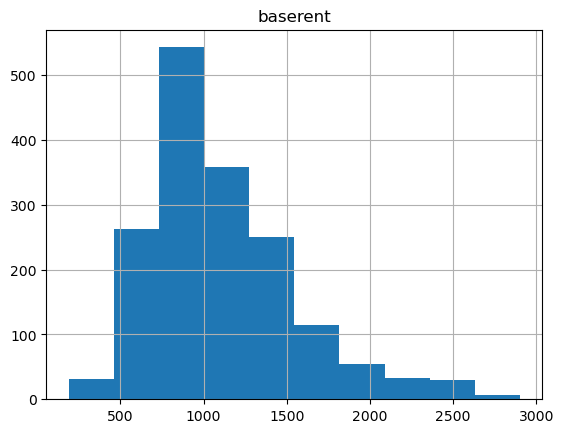

In [517]:
y_train.hist()

## using powertransform for X and Y


In [518]:
from sklearn.preprocessing import PowerTransformer

In [519]:
#fitting power transformer to use in train and test sets

pt=PowerTransformer()
pt.fit(X_train)

PowerTransformer()

In [520]:
#transforming train and test sets

X_train=pt.transform(X_train)
X_test=pt.transform(X_test)

In [521]:
#transforming y

pt.fit(y_train)
y_train=pt.transform(y_train)
y_test=pt.transform(y_test)

# CREATING LINEAR REGRESSION

In [522]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as mse
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import r2_score

In [523]:
lr=LinearRegression()

In [524]:
#creating model
model=lr.fit(X_train,y_train)

<Axes: xlabel='coeff', ylabel='name'>

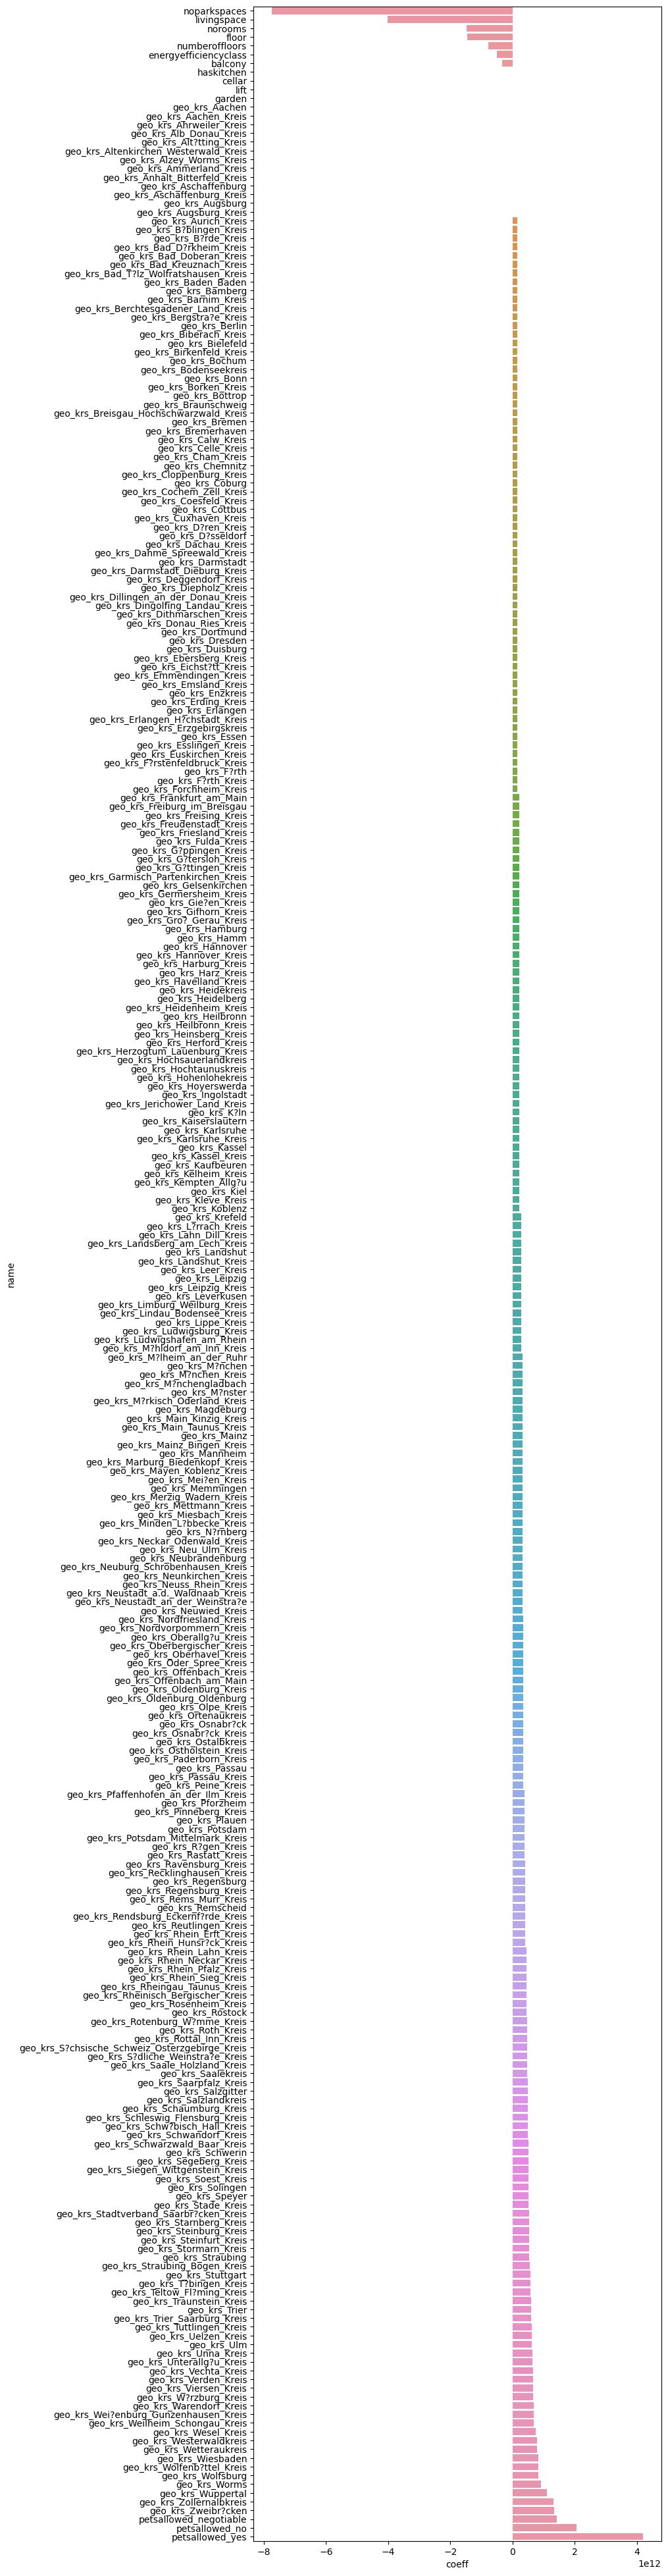

In [525]:
#visualizing
feature_names1=list(X.columns)
coefficients1 = model.coef_
coefficients1=[i for i in coefficients1[0]]
coefficients1=sorted(coefficients1)
fi_dict1 = {"name":feature_names1,"coeff":coefficients1}
fi_df1 = pd.DataFrame(fi_dict1)
fi_df1
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 50))
sns.barplot(y = fi_df1["name"],x =fi_df1["coeff"])

# checking model quality

In [526]:
#test model
y_pred=y_pred=pd.DataFrame(lr.predict(X_test))

In [527]:
#calculating mean errors
MSE_full=mse(y_pred,y_test)
RMSE_full=mse(y_pred,y_test, squared=False)
print(f"mse_full:{MSE_full}\nRMSE:{RMSE_full}")

mse_full:1.5030274631060144e+24
RMSE:1225980205022.0935


In [528]:
#calculating R2 for predictions
r2_score(y_test,y_pred)

-1.3724254507886436e+24

In [529]:
#calculating r2_score for train set
y_train_pred=pd.DataFrame(lr.predict(X_train))
r2_score(y_train,y_train_pred)

0.8721348721790564